# Classification

## Binary Classification

ဒီ notebook လေးက digit တွေကို classify လုပ်ထားတာလေးဖြစ်ပါတယ်။ ကျွန်တော်စာအုပ်ဖတ်နေရင်း လက်တွေ့စမ်းထားတာလေးတွေကို မျှဝေလိုက်ပါတယ်။

###  လိုအပ်တဲ့ Library တွေကို import လုပ်မှာဖြစ်ပါတယ်။

In [1]:
# Python ≥3.5 အထက်ရှိနေဖို့ လိုအပ် ပါတယ်။
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

MNIS ဆိုတာဟာ sample dataset တွေကို သိမ်းထားတဲ့ library တစ်ခုဖြစ်ပါတယ်။

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# 70000 rows နဲ့ 784 columns ရှိပါတယ်။

X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Saving figure some_digit_plot


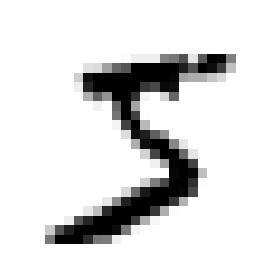

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]

# 28x28 pixel ရှိတဲ့ပုံကို လိုချင်လို့

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [6]:
y = y.astype(np.uint8)

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
import math

အောက်က function က Digit တွေကို တန်းစီပြီး ထုတ်ပြတဲ့ function ဖြစ်ပါတယ်။

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    
    n_rows = math.ceil(len(instances) / images_per_row)

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
   
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


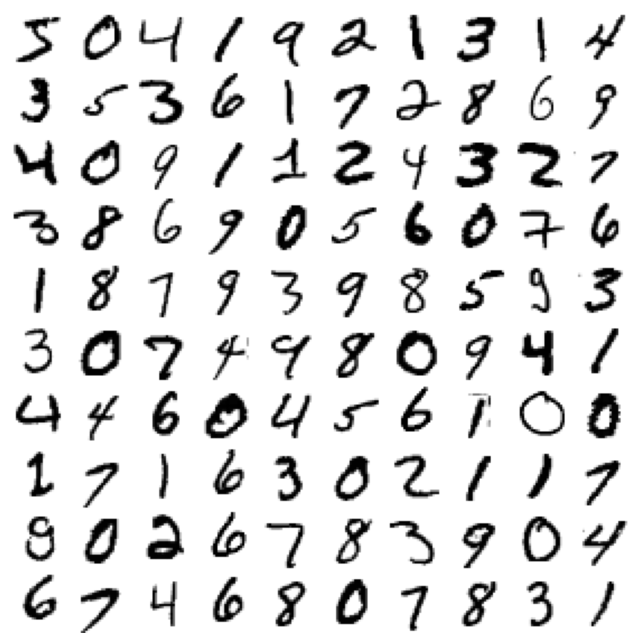

In [10]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

Train data ကို 60% နဲ့ Test data ကို 40% ထားလိုက်တာဖြစ်ပါတယ်။

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier တစ်ခုတည်ဆောက်ခြင်း

5 ဖြစ်နေရင် true ထည့်မယ် 5 မဟုတ်ရင် False လုပ်ပါမယ်။

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## SGD Classifier

Stochastic Gradient Descent ကိုသုံးမှာဖြစ်ပါတယ်။ သူ့ရဲ့ အားသာချက်က data တွေအများကြီးကို ကောင်းကောင်း ကိုင်တွယ်နိုင်ပါတယ်။

In [13]:
from sklearn.linear_model import SGDClassifier

# sgd will stop when (loss > best_loss - tol)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
# စမ်းထုတ်ကြည့်မယ်
sgd_clf.predict([some_digit])

array([ True])

Cross Validation Score ဆိုတာ ဒီ example မှာတော့ cv = 3 ဆိုပြီး data တွေကို 
သုံးပိုင်းခွဲပြီး စမ်းသပ်ထားတဲ့ score တွေဖော်ပြပေးတာဖြစ်ပါတယ်။

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

# Performance ကိုတိုင်းတာခြင်း

## measuring using cross validation

StratifiedKFold ဆိုတာက Train လုပ်မယ့် data ကို shuffle လုပ်တဲ့ နေရာမှာသုံးတဲ့ strategy တစ်မျိုးပါ။

In [16]:
#ဒီ cell ရဲ့ လုပ်ဆောင်ချက်ဟာ cross_val_score ကိုခေါ်မသုံးချင်သူတွေ အတွက်ဖြစ်ပါတယ်။

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


Estimator တွေဟာ Dataset တစ်ခုမှာ ပါရှိတဲ့ parameters တွေ နဲ့ hyper parameters တွေကို automatic predict လုပ်ပေးပါတယ်။ eg. Imputer


ဒီမှာတော့ BaseEstimator ကိုသုံးပြမှာဖြစ်ပါတယ်။

In [17]:
# output result တွေအကုန်လုံးကို False လို့ပေးပြီး စမ်းသပ်ကြည့်တာတောင် accuracy 90 ကျော်နေပါတယ်။ 
# ဒါကြောင့် data ထဲမှာ 5 မဟုတ်တာတွေများနေတယ်ဆိုတာ သိသာပါတယ်။

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

Class A ကို Class B ဆိုပြီးမှားယွင်း predict လုပ်မိတာကို Confusion Matrix နဲ့ စစ်ကြည့်လို့ရပါတယ်၊၊

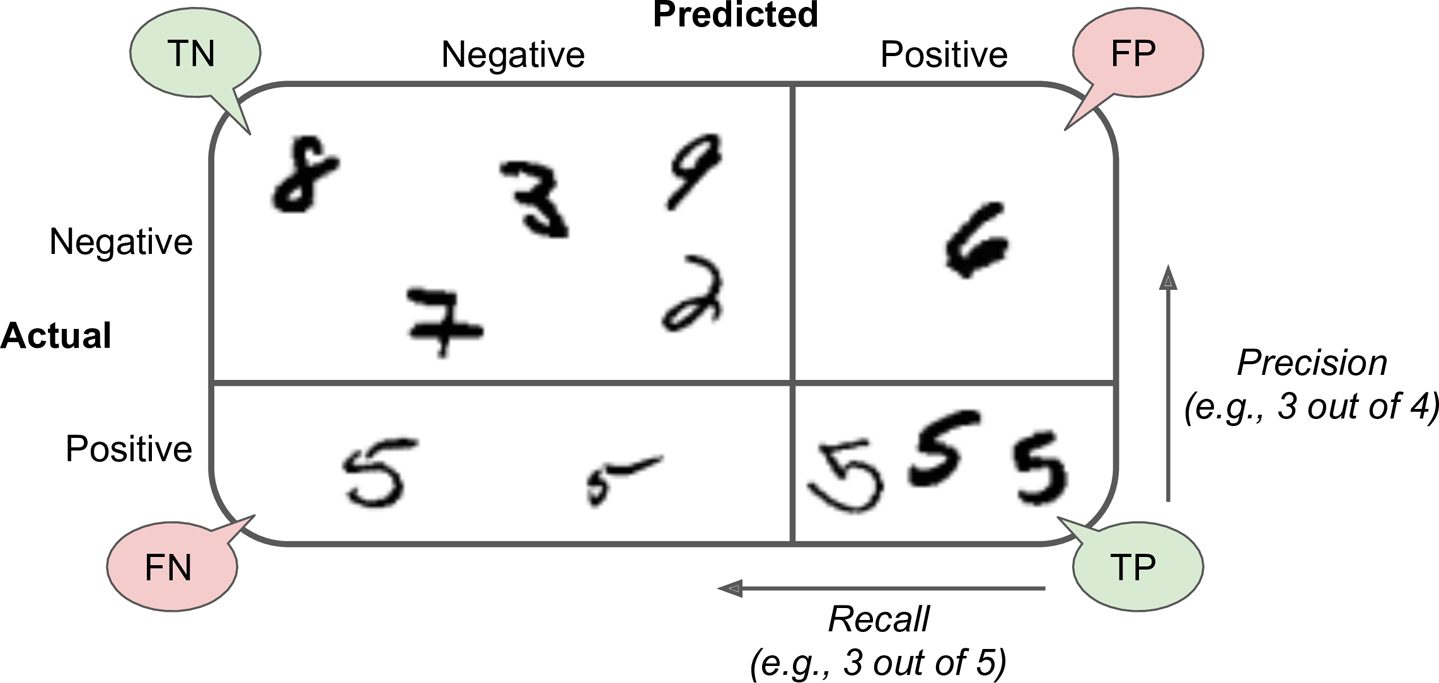

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

ခန့်မှန်းလို့ ထွက်လာတဲ့ result တွေအကုန်လုံးဟာ မှန်ကန်နေတယ်ဆိုရင် confusion matrix မှာဘယ်လိုပြနေမလဲ။

In [21]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

Precision နဲ့ recall ကို Thershold နဲ့ ချိန်ညှိပုံကို နားလည်ထားရင် ပိုကောင်းပါတယ်။

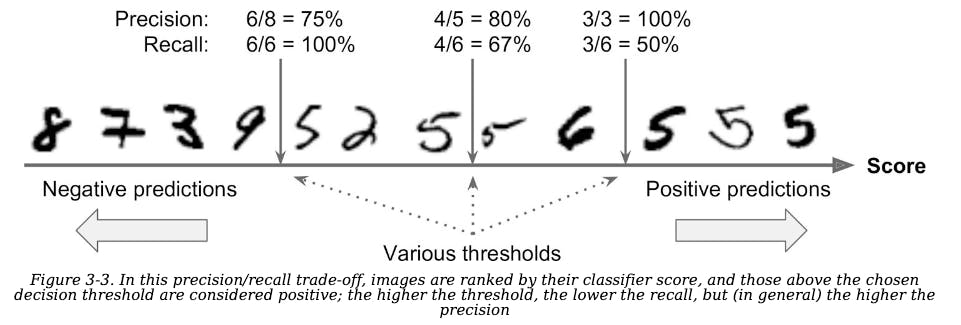

ဒီပုံထဲမှာ recall ဆိုတာက ပုံ ၆ ပုံအနက်ဘယ်နှပုံကို ခန့်မှန်းမလဲ ဆိုတာမျိူးကို သုံးသပ်တာဖြစ်ပါတယ်။ <br>
precision ဆိုတာက ခန့်မှန်းပြီးမှန်ကန်တဲ့ percentage လို့ ကနဉီး နားလည်ထားလို့ရပါတယ်။ <br>
f1 score ကတော့ overall score ပေါ့

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Trade-off

Precision နဲ့ Recall ကို ချိန်ညှိ တတ်ဖို့က အရေးကြီးပါတယ်။

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

Threshold ကို အတိုးအလျော့ လုပ်ကြည့်တဲ့အခါ result ကပြောင်းသွားမလား စစ်ကြည့်ပါမယ်။

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [27]:
y_some_digit_pred

array([ True])

In [28]:
# result က ပြောင်းလဲသွားတာကို တွေ့မြင်ရမှာဖြစ်ပါတယ်။ ဒါကြောင့် အတိုးအလျော့မှန်ကန်အောင် ချိန်ညှိဖို့က အရေးကြီးပါတယ်။

threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

### အကောင်းဆုံး threshold ရအောင်ဘယ်လိုလုပ်ကြမလဲပေါ့

precision_recall_curve က precisions, recalls, thresholds သုံးမျိုးကို return ပြန်ပေးပါတယ်

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


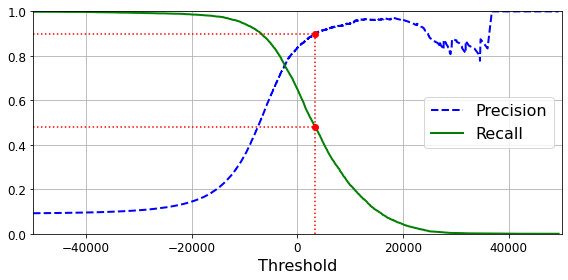

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


# np.argmax ဆိုတာက ပထမဆုံး တွေ့တဲ့တန်ဖိုးကို assign လုပ်ပေးတာဖြစ်ပါတယ်။

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro")  
save_fig("precision_recall_vs_threshold_plot")                                             
plt.show()

Saving figure precision_vs_recall_plot


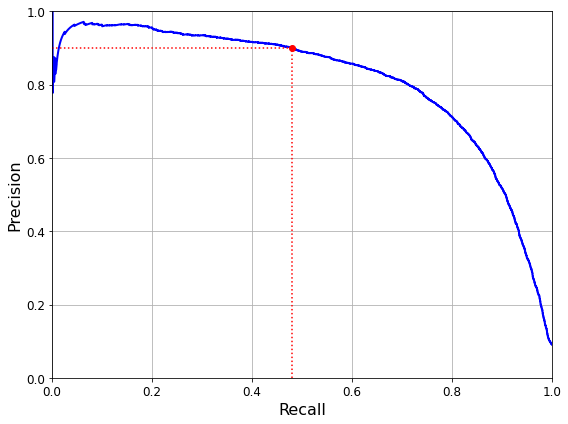

In [32]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

၉၀ ရာခိုင်နှုန်းလောက်မှန်အောင် ခန့်မှန်းနိုင်ဖို့ သုံးရမယ့် Threshold ကိုထုတ်ကြည့်လိုက်ပါတယ်။

In [33]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [34]:
threshold_90_precision

3370.0194991439557

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [36]:
# recall_score က အရမ်းနည်းနေပါတယ်။ တော်တော် ဂျီးများ နေတယ်ဆိုလို့ရပါတယ်။ 

# အကောင်းဆုံးအခြေအနေကိုရောက်အောင် လိုတိုးပိုလျော့လုပ်ကြည့်ဖို့လိုပါတယ်။

recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC Curve (Reciver Operating Characteristic)

Tpr, true positive rate ဆိုတာက recall ကိုနောက်တစ်နည်းခေါ်တာပါ။

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


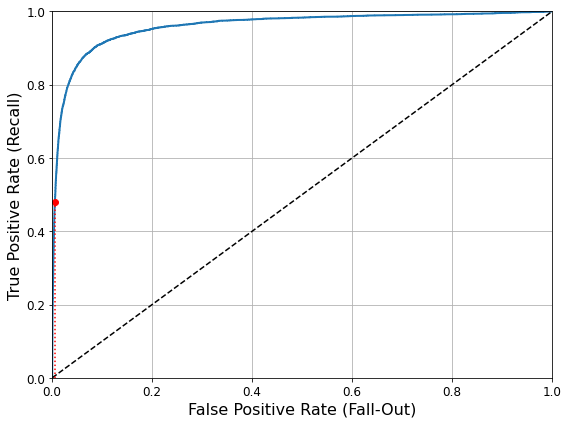

In [38]:
# recall 90% ရှိတဲ့ အနေအထားတစ်ခုကို ထုတ်ကြည့်လိုက်ပါမယ်။

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")               
save_fig("roc_curve_plot")                                    
plt.show()

## AUC (Area Under Curve)

Curve အောက်က Area ကို တိုင်းတာခြင်း

In [39]:
# recall 90 ၇ရာခိုင်နှုန်းရှိတဲ့အခြေအနေ တစ်ခုမှာ acuracy ကလည်း 96 အထိထိုးတက်သွားတာကို တွေ့ရမှာ ဖြစ်ပါတယ်။

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

n_estimators=100 လို့ထားလိုက်မှာဖြစ်ပါတယ်။ Scikit-Learn 0.2 နောက်ပိုင်းမှာ 100 က default ဖြစ်လာလို့ဖြစ်ပါတယ်။

Random Forest Classifier နဲ့ စမ်းကြည့်ရအောင်

## SGD vs Random Forest 

In [40]:
# ဒီ Classifier မှာ decision function မရှိတော့ predict_proba() ကိုသုံးပါတယ်

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [41]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [42]:
# False ဖြစ်တဲ့ score

y_probas_forest[:,0]

array([0.11, 0.99, 0.96, ..., 0.02, 0.92, 0.94])

Saving figure roc_curve_comparison_plot


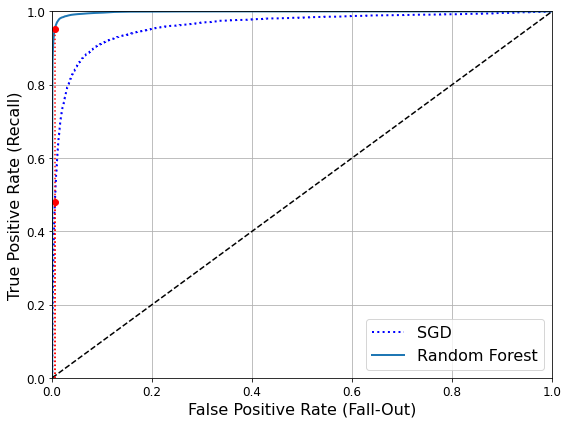

In [43]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

Ramdom Forest က SGD ထက်ပိုကောင်းနေတာတွေ့ ရပါတယ်။

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [45]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [46]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

ဒီလောက်ဆိုရင်တော်တော်ကောင်းနေပါပီ။

### ဒါ ကတော့ binary-class classification လုပ်တာကိုဖော်ပြပေးခဲ့တာ ဖြစ်ပါတယ်။

## Multi-Classification

support vector machine - SVM

In [47]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [48]:
# score အများဆုံးက ဖြစ်နိုင်ချေအရှိဆုံး
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [49]:
np.argmax(some_digit_scores)

5

Default ပါတဲ့ Classifier တွေကိုလည်းသုံးလို့ရပါတယ်။

In [50]:
# OneVsRestClassifier ကိုသုံးပြမှာဖြစ်ပါတယ်။

from sklearn.multiclass import OneVsRestClassifier

# OneVsRestClassifier ထဲမှာ Support Vector Classifier ကိုထည့်သုံးမှာဖြစ်ပါတယ်။
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [51]:
# SGD မှာလွဲသွားတာတွေ့ရတယ်။
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

Score တွေကို သိချင်ရင် decision_function ကိုသုံးရတာ အရင်ကပြောခဲ့ဖူးပါတယ်။ 
<br>ဒီမှာတော့ Array 3 အခန်းက positive ဖြစ်နေတာကြောင့် Array 3 ကိုခန့်မှန်းလိုက်ပါတယ်။

In [52]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

Predict လုပ်တာလွဲသွားပေမယ့် အခြား dataset တွေပေါ်မှာ စမ်းကြည့်လိုက်ပါမယ်။

In [53]:
# SGD Classifier က တော်တော် အဆင်ပြေနေတာကိုတွေ့ရပါတယ်။

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Standard Scaler ကိုသုံးပြီးတော့ scale လုပ်ထားတဲ့ data တွေကို ပြန်ထည့်ပြီး စမ်းကြည့်လိုက်ပါမယ်။

In [54]:
# ပိုကောင်းတဲ့ accuracy ကိုရရှိတာကိုတွေ့ရမာပါ။

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

ကျွန်တော်တို့ Error တွေကို တစ်ချက် ခွဲခြားကြည့်ရအောင်ဗျ

In [55]:
# Confusion Matrix နှိုင်းယှဉ် ထုတ်ကြည့်ရအောင်

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

Saving figure confusion_matrix_plot


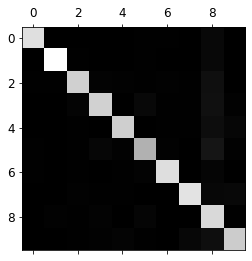

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Confusion Matrix ကို Normalize လုပ်လိုက်ပါတယ်။

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Error တက်တဲ့နေရာတွေကို သိချင်လို့ diagonal ကို 0 တွေနဲ့ အစားထိုးလိုက်ပါတယ်။

Saving figure confusion_matrix_errors_plot


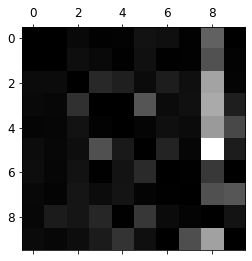

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

3 နဲ့ 5 ကရောနေတာမျိုးဖြစ်တာကြောင့် plot အရင်ထုတ်ကြည့်လိုက်ပါမယ်။

Saving figure error_analysis_digits_plot


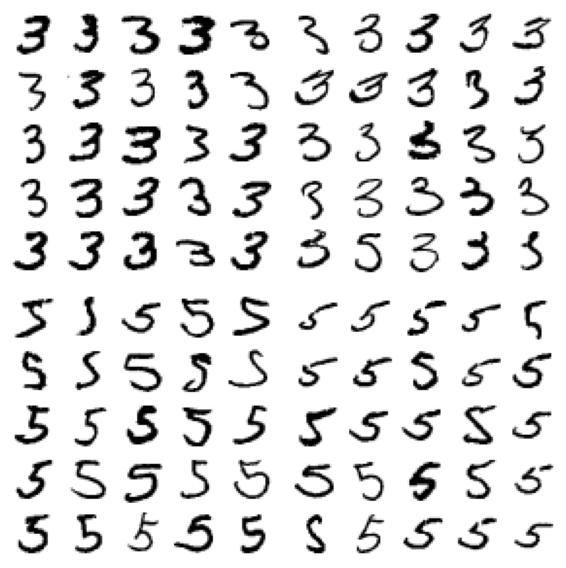

In [60]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

## Multi-label Classification

y_train ထဲမှာပါတဲ့ data က 7 ထက်ကြီးရင် True ထည့်မယ်။ ငယ်ရင် Flase။ <br>
odd ဆိုရင် True။ odd မဟုတ်ရင် False။ <br>
အဲ့နှစ်ခုကို stack တစ်ခုအနေနဲ့ မှတ်ထားလိုက်ပါမယ်။ Feature တစ်ခုအနေနဲ့ပေါ့။

In [61]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Use KNN Classifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

False True တန်ဖိုးဟာ 7 ထက်လည်းမကြီးလို့ False <br>
Odd ဖြစ်လို့ True ဆိုပီးထွက်လာတာဖြစ်ပါတယ်။ ဆိုလိုချင်တာက 5 ဖြစ်ပါတယ်ပေါ့။

In [62]:
knn_clf.predict([some_digit])

array([[False,  True]])

### f1 ဆိုတာက overall score ဖြစ်ပါတယ်။

f1_score ထုတ်တဲ့အချိန်မှာ weight method ဆိုတာကဖြစ်နိုင်ချေရှိတဲ့ output တွေကို weight တန်ဖိုးပေါင်းထည့်ပေးတာပါ။ သူကတော့ အဖြေတစ်ခုကို ရှာချင်တာမျိုး အလေးပေး ထုတ်ချင်တဲ့ 
အခါမျိုးမှာသုံးပါတယ်။ <br> <br>
macro method ဆိုတာက ထွက်လာတဲ့အဖြေတွေအားလုံးက တန်းတူအရေးကြီးတာမျိုးကို ထုတ်ချင်တဲ့အခါကျရင်သုံးပါတယ်။

In [64]:
# f1 score တော် တော်ကောင်း
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

Image တွေကို noise ထည်းပြီး original Image ကိုပြန်ထုတ်ခိုင်းကြည့်ပါမယ်။

In [65]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


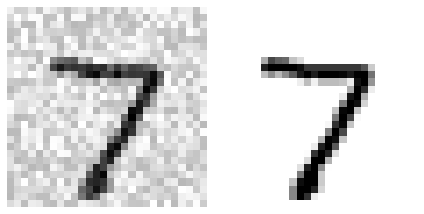

In [66]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

noise တွေနဲ့ data တွေကို train ပြီး ပုံအကြည်ပြန်ထုတ်ခိုင်းကြည့်ပါမယ်။

Saving figure cleaned_digit_example_plot


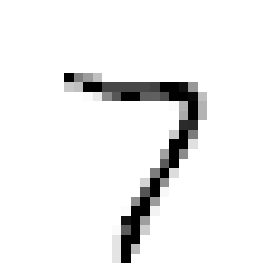

In [67]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

#### AI model ဟာ သူ့ဘာသူ noiseတွေကို clear out လုပ်ပစ်လိုက်ပြီး Original photo ပြန်ထွက်လာပါတယ်။

Noisy data တွေကို model ထဲကိုထည့်မယ်ဆိုရင်တောင် အပေါ်ကနည်းနဲ့ စစ်ထုတ်လိုက်လို့ရပါတယ်။